#### 2. WAP to implement a multi-layer perceptron (MLP) network with one hidden layer using numpy in Python. Demonstrate that it can learn the XOR Boolean function.


In [2]:
import numpy as np

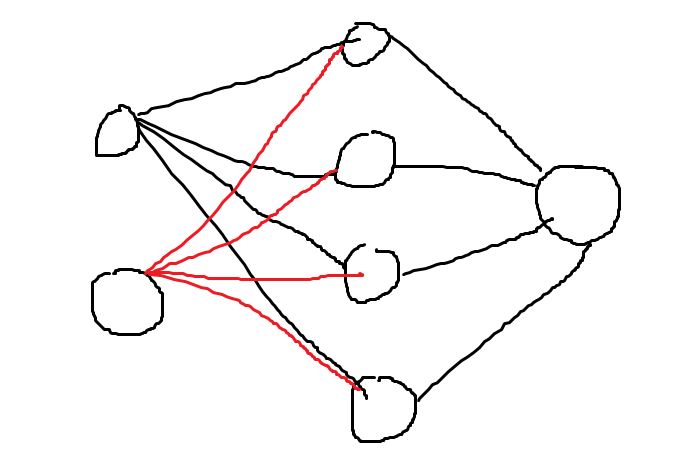

## Model Description
The model contains a single hidden layer, an input layer and a ouput layer. The output layer contains a single perceptron and the hidden layer contains four perceptron.

The four perceptrons are trained on the basis of boolean inputs using "Perceptron Learning Algorithm" where step function is used as activation function.

After training each perceptron of hidden layer give positive output only for a single combination of boolean inputs.
Finally the output perceptron is trained using the "Perceptron Learning Algorithm" where the inputs given are the outputs from each trained perceptron of the hidden layer & it gives the output mimicking the XOR function.

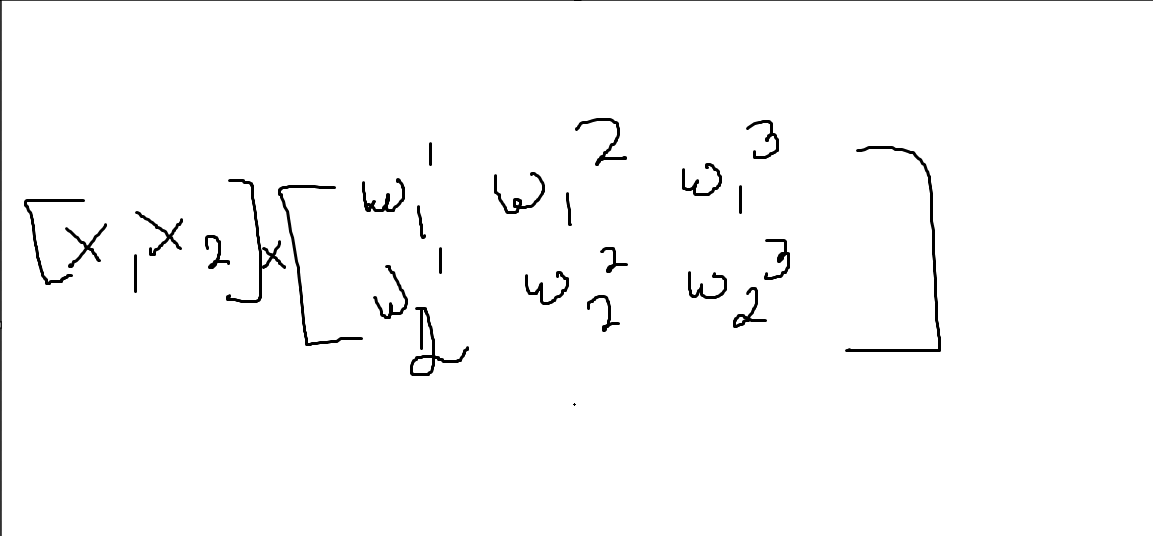

In [3]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.randn(input_size + 1)  
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)  
        return self.activation(np.dot(self.weights, x))

    def train(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X] 
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.activation(np.dot(self.weights, X[i]))
                if y[i] == 1 and y_pred == 0:
                    self.weights += self.learning_rate * X[i]
                elif y[i] == 0 and y_pred == 1:
                    self.weights -= self.learning_rate * X[i]

    def evaluate(self, X, y):
        y_pred = [self.predict(x) for x in X]
        count = 0
        for i in range(len(y)) :
            if y_pred[i]==y[i] : count+=1
        accuracy = count / len(y)
        return accuracy, y_pred

In [ ]:
fun1_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun1_y = np.array([0, 0, 0, 1])  

hiddenPerceptron1 = Perceptron(input_size=2)
hiddenPerceptron1.train(fun1_X, fun1_y)
fun1_accuracy, predictionsLayer1 = hiddenPerceptron1.evaluate(fun1_X, fun1_y)

In [ ]:
fun2_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun2_y = np.array([0, 0, 1, 0])

hiddenPerceptron2 = Perceptron(input_size=2)
hiddenPerceptron2.train(fun2_X, fun2_y)
fun2_accuracy, predictionsLayer2 = hiddenPerceptron2.evaluate(fun2_X, fun2_y)

In [ ]:
fun3_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun3_y = np.array([0, 1, 0, 0])  

hiddenPerceptron3 = Perceptron(input_size=2)
hiddenPerceptron3.train(fun3_X, fun3_y)
fun3_accuracy, predictionsLayer3 = hiddenPerceptron3.evaluate(fun3_X, fun3_y)

In [ ]:
fun4_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun4_y = np.array([1, 0, 0, 0])  

hiddenPerceptron4 = Perceptron(input_size=2)
hiddenPerceptron4.train(fun4_X, fun4_y)
fun4_accuracy, predictionsLayer4 = hiddenPerceptron4.evaluate(fun4_X, fun4_y)

In [ ]:
X = np.array([predictionsLayer1, predictionsLayer2, predictionsLayer3, predictionsLayer4])
y = np.array ([0,1,1,0]) 
perceptron = Perceptron(input_size=4)
perceptron.train(X, y)
accuracy, final_predictions = perceptron.evaluate(X, y)

In [9]:
print(f"\nfinal Perceptron Weights: {perceptron.weights}")
print(f"final Perceptron Predictions: {final_predictions}")
print(f"final Perceptron Accuracy: {accuracy * 100:.2f}%")


final Perceptron Weights: [-0.85355644 -1.02274416  0.85621381  1.22976613  0.78637719]
final Perceptron Predictions: [0, 1, 1, 0]
final Perceptron Accuracy: 100.00%


## Limitations

Step Function Restriction – The perceptrons use a step activation function, which is not differentiable, preventing gradient-based optimization (e.g., backpropagation).

Manual Feature Engineering – The hidden layer is manually designed to mimic NAND and OR, instead of learning representations automatically.

Fixed Learning Approach – The perceptron learning rule only works for linearly separable functions at each layer, limiting scalability.